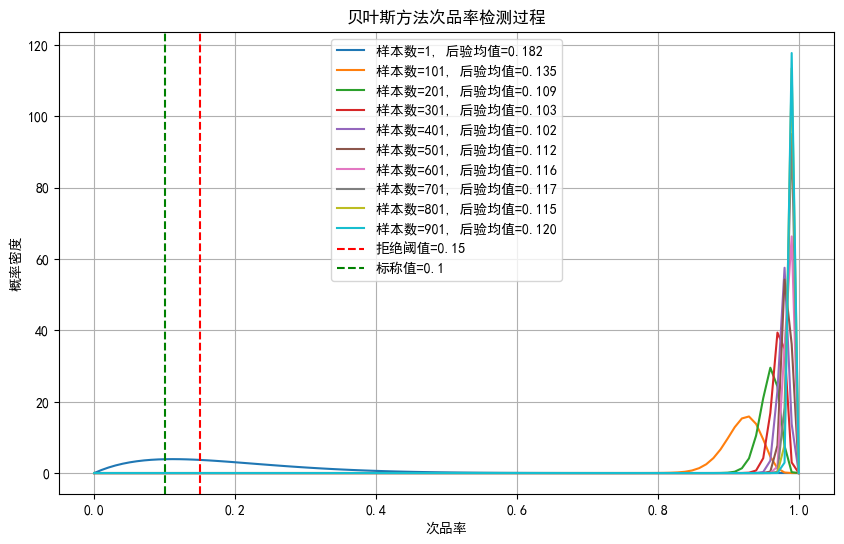

决策: 继续抽样
使用的样本数量: 1000


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def bayesian_test(p_nominal, alpha_prior, beta_prior, threshold, confidence, n_max=1000):
    """
    
    
    参数：
    p_nominal (float): 标称次品率（例如0.10）。
    alpha_prior (int): 先验Beta分布的α参数。
    beta_prior (int): 先验Beta分布的β参数。
    threshold (float): 决策的拒绝阈值（例如0.15）。
    confidence (float): 置信水平，用于决策的置信区间（例如0.95）。
    n_max (int): 最大检测样本数，防止无限循环。
    
    返回：
    str: 决策结果（'接受批次'，'拒绝批次' 或 '继续抽样'）。
    int: 使用的样本数量。
    """
    # 初始化后验分布参数
    alpha_post = alpha_prior
    beta_post = beta_prior
    n = 0
    num_defects = 0
    
    # 存储后验均值用于可视化
    posterior_means = []
    n_values = []
    
    while n < n_max:
        # 模拟检测一个样本（实际应用中应替换为实际检测结果）
        sample = np.random.rand() < p_nominal  # 如果检测到次品则为True，否则为False
        num_defects += sample  # 累加次品数量
        n += 1  # 更新样本数量
        
        # 更新后验分布参数
        alpha_post += sample
        beta_post += (1 - sample)
        
        # 计算后验均值（次品率的估计值）
        posterior_mean = alpha_post / (alpha_post + beta_post)
        posterior_means.append(posterior_mean)
        n_values.append(n)
        
        # 计算后验分布的置信区间
        lower_bound = beta.ppf((1 - confidence) / 2, alpha_post, beta_post)
        upper_bound = beta.ppf(1 - (1 - confidence) / 2, alpha_post, beta_post)
        
        # 根据后验均值和置信区间做决策
        if posterior_mean > threshold and lower_bound > p_nominal:
            decision = '拒绝批次'  # 次品率高于期望值，拒绝批次
            break
        elif upper_bound < p_nominal:
            decision = '接受批次'  # 次品率低于期望值，接受批次
            break
    else:
        decision = '继续抽样'  # 当前未能达到决策标准，继续抽样
    
    # 可视化部分
    x = np.linspace(0, 1, 100)  # 定义横坐标为次品率的取值范围
    plt.figure(figsize=(10, 6))
    # 绘制不同样本数量下的后验分布曲线
    for i in range(0, len(n_values), max(1, len(n_values) // 10)):
        plt.plot(x, beta.pdf(x, alpha_prior + i, beta_prior + n_values[i] - i), 
                 label=f'样本数={n_values[i]}, 后验均值={posterior_means[i]:.3f}')
    
    # 标注拒绝阈值和标称值
    plt.axvline(x=threshold, color='red', linestyle='--', label=f'拒绝阈值={threshold}')
    plt.axvline(x=p_nominal, color='green', linestyle='--', label=f'标称值={p_nominal}')
    plt.xlabel('次品率')
    plt.ylabel('概率密度')
    plt.title('贝叶斯方法次品率检测过程')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return decision, n

# 设置检测参数
p_nominal = 0.10  # 标称次品率
alpha_prior = 2   # 先验分布的α参数
beta_prior = 8    # 先验分布的β参数
threshold = 0.15  # 拒绝批次的阈值
confidence = 0.95 # 置信水平

# 执行贝叶斯检测并可视化
decision, samples_used = bayesian_test(p_nominal, alpha_prior, beta_prior, threshold, confidence)

print(f"决策: {decision}")
print(f"使用的样本数量: {samples_used}")
